In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
survey = pd.read_csv("./2014TourismSurvey_clean.csv")

In [5]:
survey.columns

Index(['nationality', 'country_description', 'age_group', 'if_travel_alone',
       'travelling_with', 'no_female', 'no_male', 'total_travellers',
       'purpose_code', 'purpose_other', 'activity_main', 'activity_others',
       'info_source', 'info_source_others', 'info_radio_tv_web',
       'tour_package', 'pac_transport_int', 'pac_accomodation', 'pac_food',
       'pac_transport_tz', 'pac_sightseeing', 'pac_guided_tour',
       'pac_insurance', 'currency1', 'package_cost', 'if_group_package',
       'nights_mainland', 'nights_zanzibar', 'currency2', 'spent_amount_tz',
       'acc_hotel', 'acc_others', 'food_drink', 'trans_air', 'trans_road',
       'trans_water', 'trans_railway', 'trans_rental', 'cost_transport_tz',
       'exp_cult_service', 'exp_sport', 'exp_sightseeing', 'mountain_climbing',
       'hunting', 'gate_fees', 'visa_taxes', 'exp_shopping', 'exp_other',
       'exp_other_detail', 'if_group_breakdown', 'payment_mode',
       'payment_mode_others', 'if_first_trip_tz', '

In [15]:
currencies = {'TZS': lambda x: x*0.00044, 'USD': lambda x: x, 'AUD': lambda x: x*.77, 'EUR':lambda x: x*1.23,'ZAR': lambda x: x*.083,
                  'GBP': lambda x: x*1.4, 'NOK': lambda x: x*.13, 'KES': lambda x: x*.01, 'AED': lambda x: x*.27,
                  'QAR': lambda x: x*.27, 'CAD': lambda x: x*.78, 'DKK': lambda x: x*.16, 'CHF': lambda x: x*1.03,
              'SAR': lambda x: x*.27, 'UGX': lambda x: x*0.00027, 'INR': lambda x: x*.015, 'SEK': lambda x: x*.12,
              'ZMK': lambda x: x*.11, 'NZD': lambda x: x*.72, 'JYP': lambda x: x*.0093, 'ROL': lambda x: x*.26}

for k, v in currencies.items():
    survey.loc[survey["currency2"]==k, "spentInUSD"] = survey['spent_amount_tz'].apply(v)

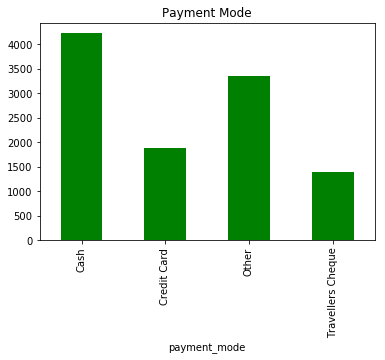

In [44]:
survey['payment_mode'].unique()
survey.groupby('payment_mode')['spentInUSD'].mean().plot("bar", color="green", title="Payment Mode")

plt.show()

In [35]:
#Basically showing you can ignore the payment_mode_others column because it's nonsense. What little value it provides,
#it is sure to negate.

np.unique(survey['payment_mode_others'].apply(lambda x: str(x)).values, return_counts=True)

(array(['0', 'BANK TRANSFER', 'BAR', 'C', 'COMPANY PAID ON BEHALF',
        'CREDIT CARD', 'DEBIT CARD', 'DEBT CARD', 'IN ADVANCE', 'PRE PAID',
        'PREPAID', 'T.S', 'WIRE RASFOR', 'Y', 'nan'], dtype=object),
 array([  17,    2,    1,    4,    1,   14,    2,    1,    1,    1,    1,
           1,    1,    1, 7430]))